# Communities_and_Crime

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math
import pickle

from scipy.io import arff
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import (confusion_matrix,plot_confusion_matrix,
                            ConfusionMatrixDisplay,accuracy_score,f1_score,
                            mean_squared_error, mean_absolute_error, max_error,
                            r2_score, explained_variance_score)

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPRegressor

## Loading Data

In [153]:
Dataset = pd.read_csv('Regression_Datasets/2_Communities_and_Crime/Communities_and_Crime.data', delimiter=',', header=None) 
Dataset.head()

0   1      2                    3    4     5     6     7     8     9    \
0    8   ?      ?         Lakewoodcity    1  0.19  0.33  0.02  0.90  0.12   
1   53   ?      ?          Tukwilacity    1  0.00  0.16  0.12  0.74  0.45   
2   24   ?      ?         Aberdeentown    1  0.00  0.42  0.49  0.56  0.17   
3   34   5  81440  Willingborotownship    1  0.04  0.77  1.00  0.08  0.12   
4   42  95   6096    Bethlehemtownship    1  0.01  0.55  0.02  0.95  0.09   

   ...   118   119   120   121   122  123  124   125   126   127  
0  ...  0.12  0.26  0.20  0.06  0.04  0.9  0.5  0.32  0.14  0.20  
1  ...  0.02  0.12  0.45     ?     ?    ?    ?  0.00     ?  0.67  
2  ...  0.01  0.21  0.02     ?     ?    ?    ?  0.00     ?  0.43  
3  ...  0.02  0.39  0.28     ?     ?    ?    ?  0.00     ?  0.12  
4  ...  0.04  0.09  0.02     ?     ?    ?    ?  0.00     ?  0.03  

[5 rows x 128 columns]

## Data Prepration And Analysis

In [154]:
print(np.count_nonzero(Dataset==np.nan))
print(np.count_nonzero(Dataset=="?"))
Dataset.isnull().sum()


0
39202


0      0
1      0
2      0
3      0
4      0
      ..
123    0
124    0
125    0
126    0
127    0
Length: 128, dtype: int64

In [155]:
# We dont dop them bc we were asked not to do so!
Dataset.isin(["?"]).sum()

0         0
1      1174
2      1177
3         0
4         0
       ... 
123    1675
124    1675
125       0
126    1675
127       0
Length: 128, dtype: int64

In [156]:
Dataset.shape

(1994, 128)

In [157]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, 0 to 127
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


In [158]:
Dataset.describe().T

count       mean        std  min    25%    50%    75%   max
0    1994.0  28.683551  16.397553  1.0  12.00  34.00  42.00  56.0
4    1994.0   5.493982   2.873694  1.0   3.00   5.00   8.00  10.0
5    1994.0   0.057593   0.126906  0.0   0.01   0.02   0.05   1.0
6    1994.0   0.463395   0.163717  0.0   0.35   0.44   0.54   1.0
7    1994.0   0.179629   0.253442  0.0   0.02   0.06   0.23   1.0
..      ...        ...        ...  ...    ...    ...    ...   ...
118  1994.0   0.065231   0.109459  0.0   0.02   0.04   0.07   1.0
119  1994.0   0.232854   0.203092  0.0   0.10   0.17   0.28   1.0
120  1994.0   0.161685   0.229055  0.0   0.02   0.07   0.19   1.0
125  1994.0   0.094052   0.240328  0.0   0.00   0.00   0.00   1.0
127  1994.0   0.237979   0.232985  0.0   0.07   0.15   0.33   1.0

[102 rows x 8 columns]

In [159]:
Dataset.apply(lambda x: len(x.unique()))

0        46
1       109
2       800
3      1828
4        10
       ... 
123      73
124       4
125      80
126      52
127      98
Length: 128, dtype: int64

<AxesSubplot:>

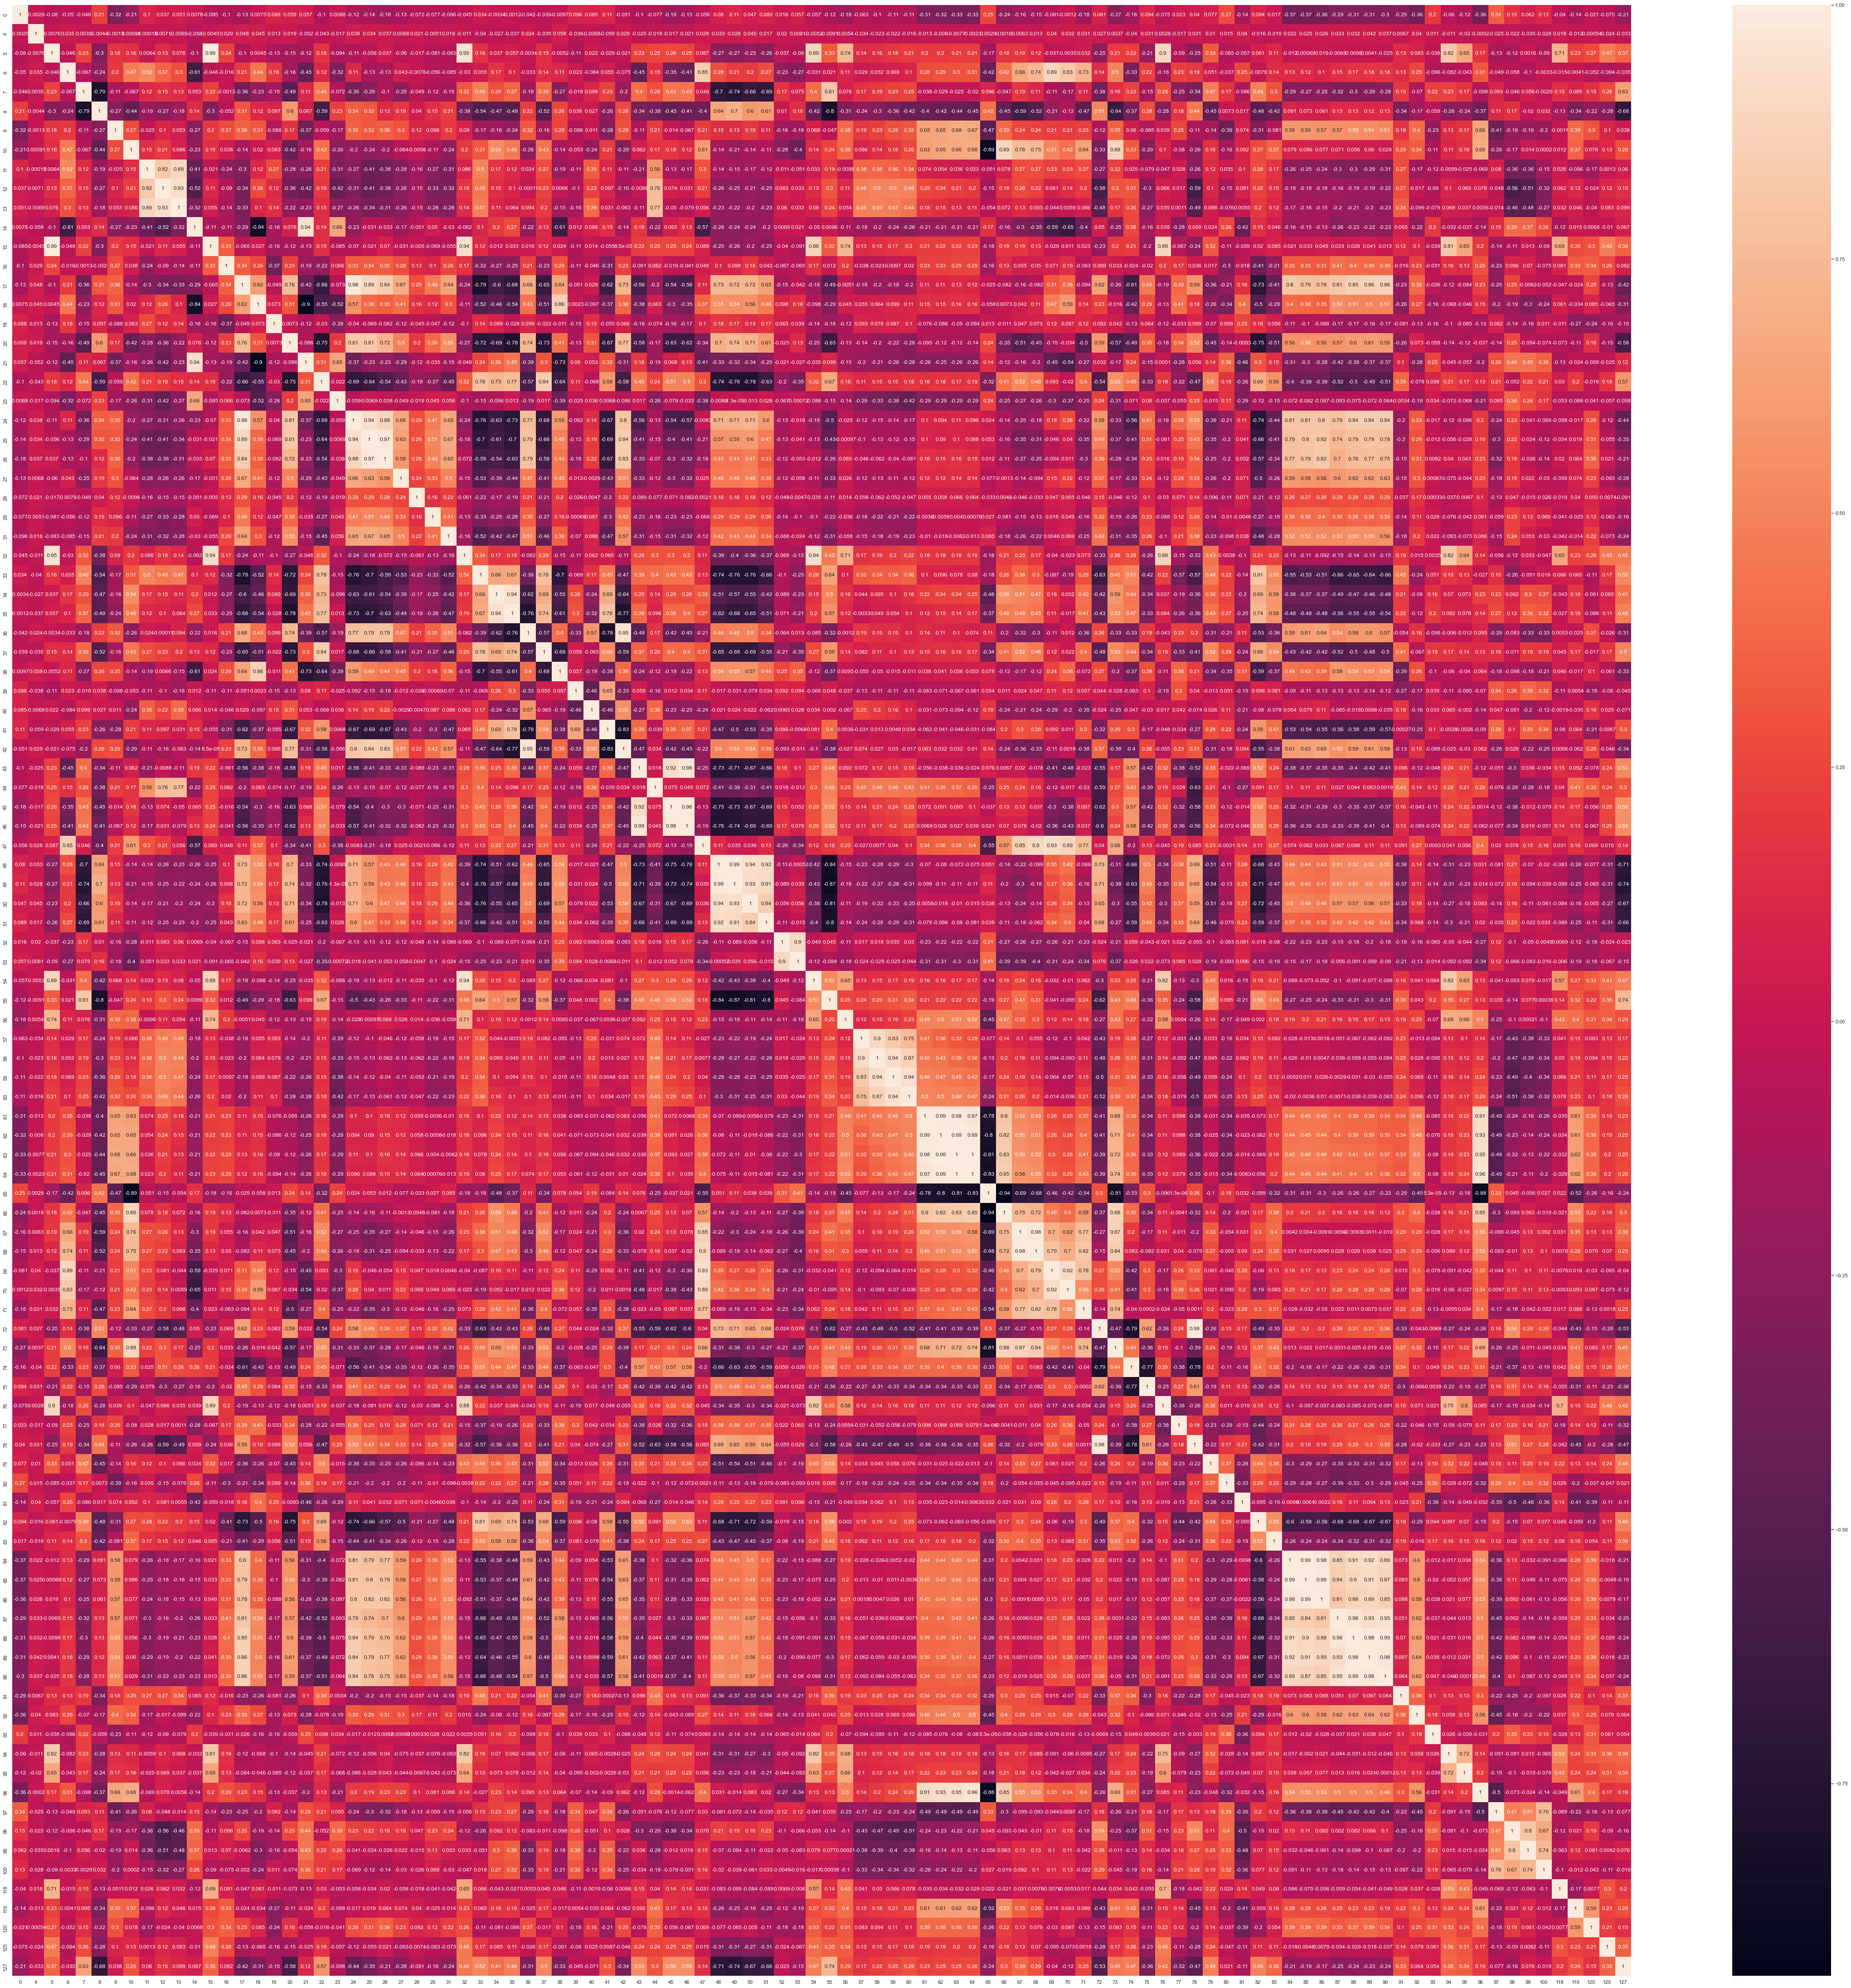

In [165]:
plt.figure(figsize=(80,80))
sns.heatmap(Dataset.corr(), annot =True )

<AxesSubplot:>

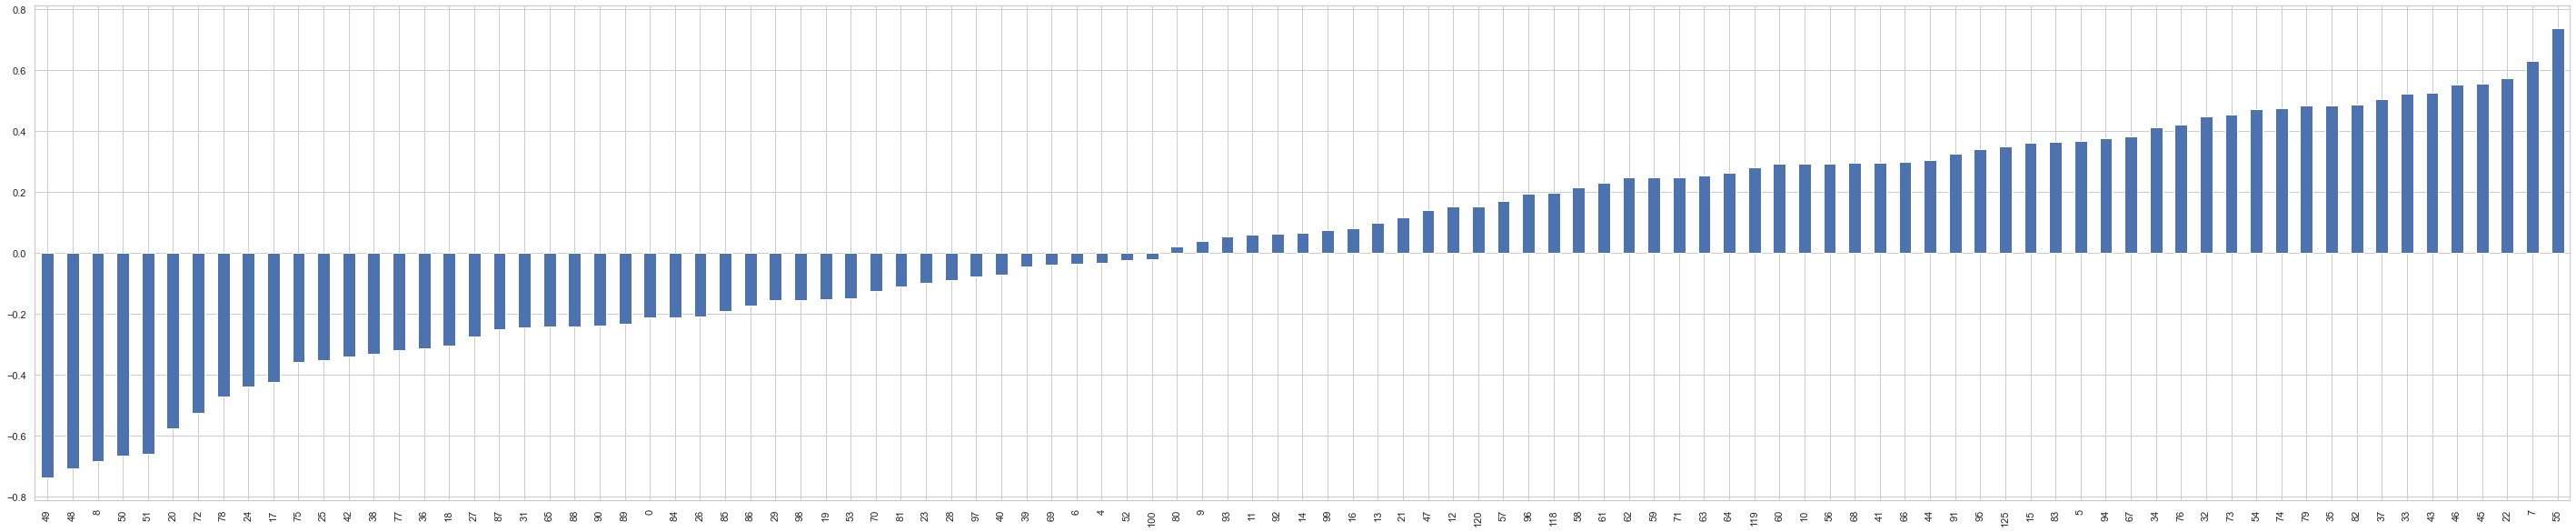

In [167]:
plt.figure(figsize=(50,10))
cor = Dataset.corr()[127][:-1].sort_values()
cor.plot(kind="bar")


0.03    104
0.04     92
0.06     86
0.05     80
0.02     74
       ... 
0.79      2
0.77      1
0.89      1
0.94      1
0.96      1
Name: 127, Length: 98, dtype: int64
---------------------------


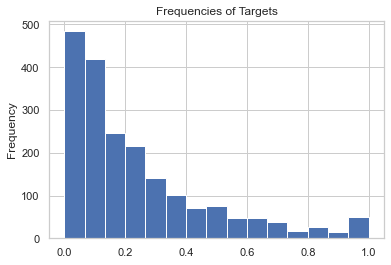

In [164]:
frequency = Dataset[127].value_counts()
print(frequency)
print("---------------------------")
plt.title('Frequencies of Targets')
Dataset[127].plot.hist(subplots=True, figsize=(20, 30), bins=15);

### Defining Dictionary Of Models

In [150]:
# MODELS = {'linear_r', 'svr', 'decision_tree_r', 'random_forest_r', 'knn_r', 'adaboost_r', 'gaussian_process_r', 'neural_network_r'}
MODELS = {'linear_r', 'svr', 'decision_tree_r', 'random_forest_r','knn_r', "adaboost_r", "GaussianProcessRegressor", "nn_r"}
communities_and_crime_dict = {}  

## Train and Test set

In [6]:
df = df.drop(3, axis=1)
x = df.iloc[:,:-1]
y = df.iloc[:, -1:]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.85, test_size=0.15, random_state=0)

# change'?' to NaN for our training&testing sets
X_train = X_train.replace('?', np.NaN)
y_train = y_train.replace('?', np.NaN)
X_test = X_test.replace('?', np.NaN)
y_test = y_test.replace('?', np.NaN)
# impute NaN values in our training&testing sets to the mean of corresponding column
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imp.fit_transform(X_train)
y_train = imp.fit_transform(y_train)
X_test = imp.fit_transform(X_test)
y_test = imp.fit_transform(y_test)

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [8]:
StScale = StandardScaler()
StScale.fit(X_train)
X_train = StScale.transform(X_train)

X_test = StScale.transform(X_test)

In [76]:
from tabulate import tabulate
def model_results(model):
    table = [["Parameters / Metrics", "Tuned"]]
    curr_model = model['model']
    
    if model['hyperparameters'] == 1:
        for param in curr_model.best_params_:
            table.append([param, curr_model.best_params_[param]])
    
    linear_r_predict = curr_model.predict(X_test)
    
    rmse = np.sqrt( mean_squared_error(y_test, linear_r_predict))
    model['rmse'] = rmse
    mse = mean_squared_error(y_test, linear_r_predict)
    model['mse'] = mse
    r2 = r2_score(y_test, linear_r_predict)
    model['r2'] = r2
    
    linear_r_predict_trn = curr_model.predict(X_train)
    mse_trn = mean_squared_error(y_train, linear_r_predict_trn)
    model['mse_trn'] = mse_trn
    r2_trn = r2_score(y_train, linear_r_predict_trn)
    model['r2_trn'] = r2_trn
    
    table.append(['Root Mean Squarred Error', rmse])
    table.append(['Mean Squarred Error', mse])
    table.append(['r2 Score ',r2])
    table.append(['Mean Squarred Error (train)', mse_trn])
    table.append(['r2 Score (train)',r2_trn])
    
    print(tabulate(table, headers='firstrow', tablefmt='grid'))

## Linear Regression

In [10]:
linear_r = LinearRegression()
linear_r.fit(X_train, y_train)



### Linear Regression Analysis

In [172]:
communities_and_crime_dict['linear_r'] = {'model':linear_r, 'hyperparameters':0}
model_results(communities_and_crime_dict['linear_r'])

+-----------------------------+-----------+
| Parameters / Metrics        |     Tuned |
+=============================+===========+
| Root Mean Squarred Error    | 0.134765  |
+-----------------------------+-----------+
| Mean Squarred Error         | 0.0181617 |
+-----------------------------+-----------+
| r2 Score                    | 0.657734  |
+-----------------------------+-----------+
| Mean Squarred Error (train) | 0.0159471 |
+-----------------------------+-----------+
| r2 Score (train)            | 0.707191  |
+-----------------------------+-----------+


## Support Vector Regression

In [12]:
svr = SVR().fit(X_train, y_train)

In [13]:
parameters = {
    'C': scipy.stats.uniform(1, 10), 
    'gamma': scipy.stats.uniform(0, 1)
}
svr_model = RandomizedSearchCV(svr, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
svr_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 1.7103605819788694, 'gamma': 0.08712929970154071}

In [14]:
svr_model.best_estimator_

SVR(C=1.7103605819788694, gamma=0.08712929970154071)

### Support Vector Regression Analysis

In [173]:
communities_and_crime_dict['svr'] = {'model':svr_model, 'hyperparameters':1}
model_results(communities_and_crime_dict['svr'])

+-----------------------------+------------+
| Parameters / Metrics        |      Tuned |
+=============================+============+
| C                           | 1.71036    |
+-----------------------------+------------+
| gamma                       | 0.0871293  |
+-----------------------------+------------+
| Root Mean Squarred Error    | 0.224017   |
+-----------------------------+------------+
| Mean Squarred Error         | 0.0501837  |
+-----------------------------+------------+
| r2 Score                    | 0.054266   |
+-----------------------------+------------+
| Mean Squarred Error (train) | 0.00815885 |
+-----------------------------+------------+
| r2 Score (train)            | 0.850193   |
+-----------------------------+------------+


## Decision Tree Regression

In [16]:
tree = DecisionTreeRegressor().fit(X_train, y_train)

In [17]:
parameters = {
    'max_depth': scipy.stats.uniform(1, 100),
    'min_samples_split': scipy.stats.uniform(0, 1) 
}
tree_model = RandomizedSearchCV(tree, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
tree_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 8.103605819788694, 'min_samples_split': 0.08712929970154071}

### Decision tree Analysis

In [174]:
communities_and_crime_dict['decision_tree_r'] = {'model':tree_model, 'hyperparameters':1}
model_results(communities_and_crime_dict['decision_tree_r'])

+-----------------------------+-----------+
| Parameters / Metrics        |     Tuned |
+=============================+===========+
| max_depth                   | 8.10361   |
+-----------------------------+-----------+
| min_samples_split           | 0.0871293 |
+-----------------------------+-----------+
| Root Mean Squarred Error    | 0.15615   |
+-----------------------------+-----------+
| Mean Squarred Error         | 0.0243829 |
+-----------------------------+-----------+
| r2 Score                    | 0.540494  |
+-----------------------------+-----------+
| Mean Squarred Error (train) | 0.0196891 |
+-----------------------------+-----------+
| r2 Score (train)            | 0.638483  |
+-----------------------------+-----------+


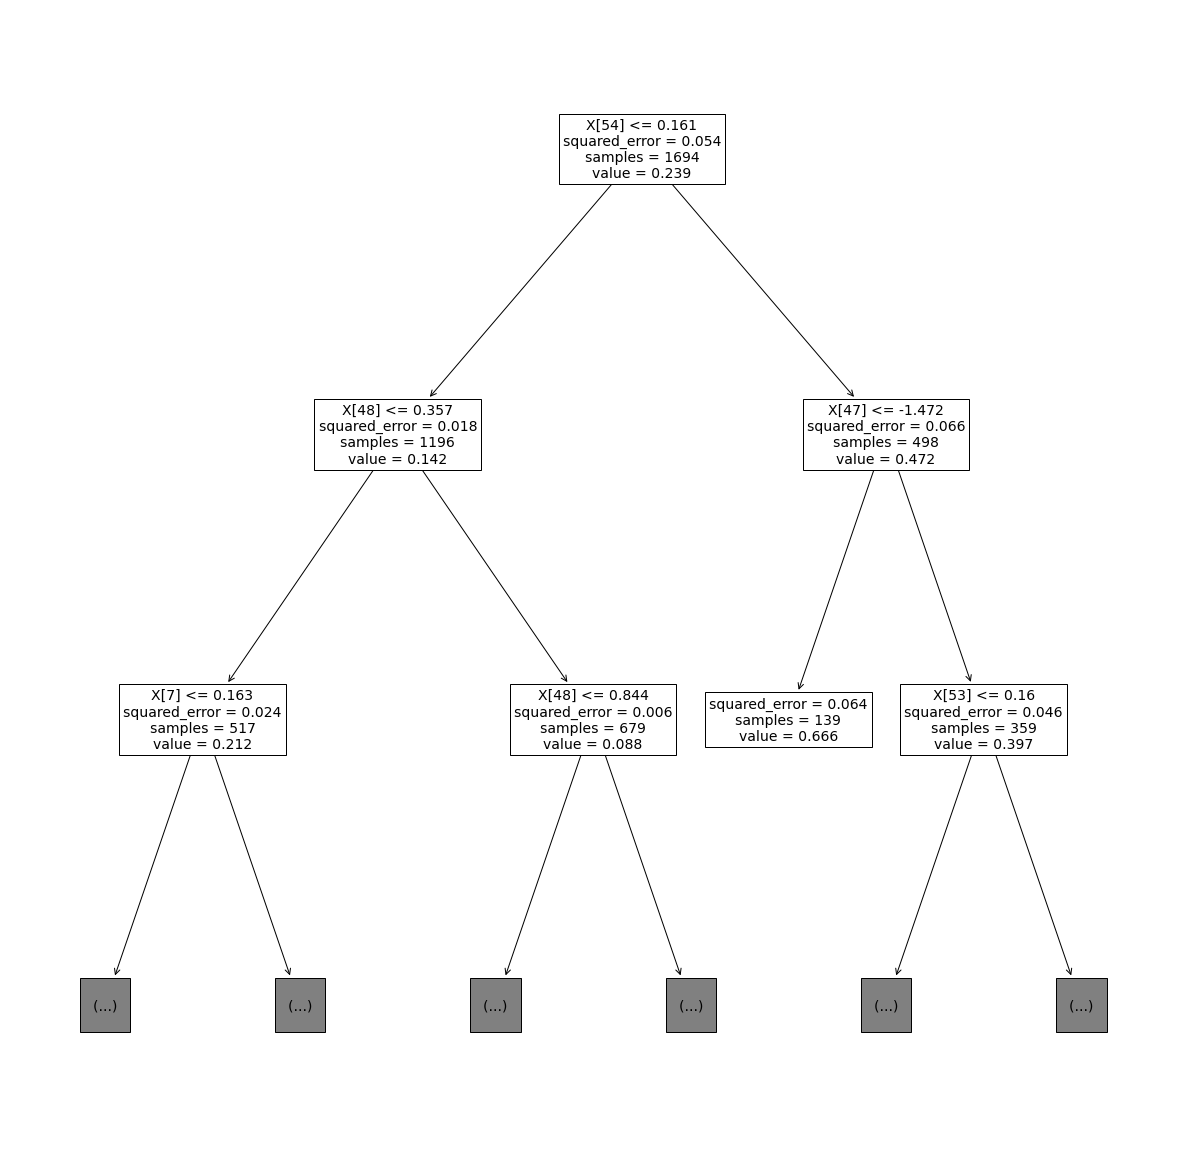

In [19]:
plt.figure(figsize=(21,21))
plot_tree(tree_model.best_estimator_, max_depth = 2, fontsize=14);

## Random Forest Regression

In [20]:
forest = RandomForestRegressor()
forest = forest.fit(X_train, y_train)

In [21]:
parameters = {
    'n_estimators': range(100,150),
    'max_depth': scipy.stats.uniform(1, 100),
}
forest_model = RandomizedSearchCV(forest, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
forest_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 78.81567509498505, 'n_estimators': 147}

### Random Forest Analysis

In [175]:
communities_and_crime_dict['random_forest_r'] = {'model':forest_model, 'hyperparameters':1}
model_results(communities_and_crime_dict['random_forest_r'])

+-----------------------------+--------------+
| Parameters / Metrics        |        Tuned |
+=============================+==============+
| max_depth                   |  78.8157     |
+-----------------------------+--------------+
| n_estimators                | 147          |
+-----------------------------+--------------+
| Root Mean Squarred Error    |   0.135681   |
+-----------------------------+--------------+
| Mean Squarred Error         |   0.0184094  |
+-----------------------------+--------------+
| r2 Score                    |   0.653068   |
+-----------------------------+--------------+
| Mean Squarred Error (train) |   0.00260516 |
+-----------------------------+--------------+
| r2 Score (train)            |   0.952166   |
+-----------------------------+--------------+


## K Nearest Neighbours Regression(KNN)

In [23]:
knn =  KNeighborsRegressor()

In [24]:
parameters = {
    'n_neighbors': range(1, 100), 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'weights': ['uniform', 'distance'], 
    'leaf_size': scipy.stats.uniform(1, 50)
}
knn_model = RandomizedSearchCV(knn, parameters,verbose=1,random_state=0,n_iter=100, cv =10).fit(X_train, y_train)
knn_model.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'algorithm': 'ball_tree',
 'leaf_size': 40.02645881432277,
 'n_neighbors': 15,
 'weights': 'distance'}

In [25]:
knn_model.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', leaf_size=40.02645881432277,
                    n_neighbors=15, weights='distance')

### KNN Analysis

In [176]:
communities_and_crime_dict['knn_r'] = {'model':knn_model, 'hyperparameters':1}
model_results(communities_and_crime_dict['knn_r'])

+-----------------------------+---------------------+
| Parameters / Metrics        | Tuned               |
+=============================+=====================+
| algorithm                   | ball_tree           |
+-----------------------------+---------------------+
| leaf_size                   | 40.02645881432277   |
+-----------------------------+---------------------+
| n_neighbors                 | 15                  |
+-----------------------------+---------------------+
| weights                     | distance            |
+-----------------------------+---------------------+
| Root Mean Squarred Error    | 0.14751850919883203 |
+-----------------------------+---------------------+
| Mean Squarred Error         | 0.02176171055624589 |
+-----------------------------+---------------------+
| r2 Score                    | 0.5898912302436029  |
+-----------------------------+---------------------+
| Mean Squarred Error (train) | 0.0                 |
+---------------------------

## Adaboost

In [27]:
AdaBoost = AdaBoostRegressor()

In [28]:
AdaBoost.fit(X_train,y_train)

AdaBoostRegressor()

In [29]:
param_distribution = {'learning_rate':scipy.stats.uniform(0.01,5),
                'n_estimators': range(1,250),
                'loss' : ['linear', 'square', 'exponential']}

In [30]:
adaBoost_randomized = RandomizedSearchCV(AdaBoost,
                                         param_distribution ,
                                         verbose=1, random_state=0,
                                         cv=5, n_iter=100).fit(X_train,y_train)


adaBoost_randomized.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'learning_rate': 0.05678352428266308,
 'loss': 'exponential',
 'n_estimators': 52}

### Adaboost Analysis

In [177]:
communities_and_crime_dict['adaboost_r'] = {'model':adaBoost_randomized, 'hyperparameters':1}
model_results(communities_and_crime_dict['adaboost_r'])

+-----------------------------+----------------------+
| Parameters / Metrics        | Tuned                |
+=============================+======================+
| learning_rate               | 0.05678352428266308  |
+-----------------------------+----------------------+
| loss                        | exponential          |
+-----------------------------+----------------------+
| n_estimators                | 52                   |
+-----------------------------+----------------------+
| Root Mean Squarred Error    | 0.14269865520789274  |
+-----------------------------+----------------------+
| Mean Squarred Error         | 0.020362906198141056 |
+-----------------------------+----------------------+
| r2 Score                    | 0.616252298365962    |
+-----------------------------+----------------------+
| Mean Squarred Error (train) | 0.017808906608170555 |
+-----------------------------+----------------------+
| r2 Score (train)            | 0.6730054222812084   |
+---------

## GaussianProcessRegressor

In [44]:
GPR = GaussianProcessRegressor(kernel = 1.0 * RBF(1.0), normalize_y = False)

In [47]:
param_distribution = {'kernel':[Matern(i) for i in [0.2, 0.5, 1,2,3,5]]  +
                      [RBF(i) for i in [0.2, 0.5, 1,2,3,5]]}


In [34]:
GPR_model = RandomizedSearchCV(GPR, param_distribution, cv=5 ,random_state=0,verbose=1)
GPR_model.fit(X_train, y_train)
GPR_model.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'kernel': Matern(length_scale=1, nu=1.5)}

### GaussianProcessRegressor analysis

In [178]:
communities_and_crime_dict['GaussianProcessRegressor'] = {'model':GPR_model, 'hyperparameters':1}
model_results(communities_and_crime_dict['GaussianProcessRegressor'])

+-----------------------------+--------------------------------+
| Parameters / Metrics        | Tuned                          |
+=============================+================================+
| kernel                      | Matern(length_scale=1, nu=1.5) |
+-----------------------------+--------------------------------+
| Root Mean Squarred Error    | 0.14732714849152215            |
+-----------------------------+--------------------------------+
| Mean Squarred Error         | 0.021705288682643018           |
+-----------------------------+--------------------------------+
| r2 Score                    | 0.5909545246528737             |
+-----------------------------+--------------------------------+
| Mean Squarred Error (train) | 1.1011320794037133e-18         |
+-----------------------------+--------------------------------+
| r2 Score (train)            | 1.0                            |
+-----------------------------+--------------------------------+


## neural_network_regression (MLPRegressor)

In [36]:
nn_r = MLPRegressor()

In [37]:
param_distribution ={'max_iter': range(1000, 1500),
                     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                     'learning_rate':['constant', 'invscaling', 'adaptive'],
                     'alpha': scipy.stats.reciprocal(0.00001, 0.1), 
                    'solver':["adam",'sgd'],
                    'activation':["identity",'tanh', "relu", "logistic"]   
}

In [38]:
nnr_model = RandomizedSearchCV(nn_r,
                                         param_distribution ,
                                         verbose=1, random_state=0,
                                         cv=5, n_iter=100).fit(X_train,y_train)


nnr_model.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'activation': 'logistic',
 'alpha': 0.04077499365367607,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'max_iter': 1031,
 'solver': 'adam'}

### neural_network_regression analysis

In [179]:
communities_and_crime_dict['nn_r'] = {'model':nnr_model, 'hyperparameters':1}
model_results(communities_and_crime_dict['nn_r'])

+-----------------------------+----------------------+
| Parameters / Metrics        | Tuned                |
+=============================+======================+
| activation                  | logistic             |
+-----------------------------+----------------------+
| alpha                       | 0.04077499365367607  |
+-----------------------------+----------------------+
| hidden_layer_sizes          | (100,)               |
+-----------------------------+----------------------+
| learning_rate               | adaptive             |
+-----------------------------+----------------------+
| max_iter                    | 1031                 |
+-----------------------------+----------------------+
| solver                      | adam                 |
+-----------------------------+----------------------+
| Root Mean Squarred Error    | 0.13579651336576423  |
+-----------------------------+----------------------+
| Mean Squarred Error         | 0.018440693042298187 |
+---------

+--------------------------+-----------+------------+---------------+--------------------+----------+
| Model Name               |       MSE |   r2 Score |   MSE (train) |   r2 Score (train) |     RMSE |
+==========================+===========+============+===============+====================+==========+
| decision_tree_r          | 0.0243829 |   0.540494 |   0.0196891   |           0.638483 | 0.15615  |
+--------------------------+-----------+------------+---------------+--------------------+----------+
| linear_r                 | 0.0181617 |   0.657734 |   0.0159471   |           0.707191 | 0.134765 |
+--------------------------+-----------+------------+---------------+--------------------+----------+
| adaboost_r               | 0.0203629 |   0.616252 |   0.0178089   |           0.673005 | 0.142699 |
+--------------------------+-----------+------------+---------------+--------------------+----------+
| knn_r                    | 0.0217617 |   0.589891 |   0           |           1 

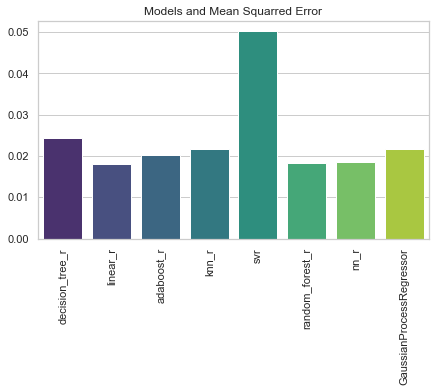

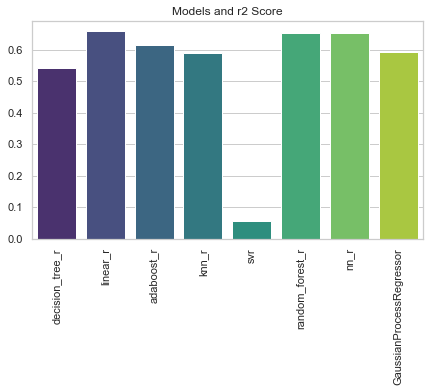

In [187]:
def cross_checking_model_results(dictionary):
    table = [["Model Name", "MSE", "r2 Score","MSE (train)", "r2 Score (train)" , "RMSE"]]
    x_models = []
    y_mse = []
    y_r2 = []
    y_mse_trn = []
    y_r2_trn = []
    y_rmse = []
    
    for model_key in MODELS:
        table.append([model_key, dictionary[model_key]['mse'], dictionary[model_key]['r2'],
                                 dictionary[model_key]['mse_trn'], dictionary[model_key]['r2_trn'],
                                                         dictionary[model_key]['rmse']            ])
        x_models.append(model_key)
        y_mse.append(dictionary[model_key]['mse'])
        y_r2.append(dictionary[model_key]['r2'])
        y_mse_trn.append(dictionary[model_key]['mse_trn'])
        y_r2_trn.append(dictionary[model_key]['r2_trn'])
        y_rmse.append(dictionary[model_key]['rmse'])
    print(tabulate(table, headers='firstrow', tablefmt='grid'))
    
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(7,4))
    ax1 = sns.barplot(x=x_models, y=y_mse, palette="viridis")
    ax1.set_title('Models and Mean Squarred Error')
    ax1.set_xticklabels(labels=x_models, rotation=90)
    plt.figure(figsize=(7,4))
    ax2 = sns.barplot(x=x_models, y=y_r2, palette="viridis")
    ax2.set_title('Models and r2 Score')
    ax2.set_xticklabels(labels=x_models, rotation=90)


cross_checking_model_results(communities_and_crime_dict)

### Regression Dictionary
Exporting Model Data for Later Analysis and Comparison

In [88]:
with open('base_regression_dict.dictionary', 'rb') as config_dictionary_file:
    base_regression_dict = pickle.load(config_dictionary_file)

base_regression_dict['communities_and_crime']= communities_and_crime_dict

with open('base_regression_dict.dictionary', 'wb') as config_dictionary_file:
    pickle.dump(base_regression_dict, config_dictionary_file)